In [3]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import eli5
from eli5.sklearn import PermutationImportance

In [4]:
#Read Train and Test csv
santander_train = pd.read_csv("..//Projects//train.csv")
santander_test = pd.read_csv("..//Projects//test.csv")

In [3]:
#Display the train dataframe
santander_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
#Display the test dataframe
santander_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
#Train and Test shape
santander_train.shape, santander_test.shape

((200000, 202), (200000, 201))

In [6]:
#describe() Train - to know the statstical details or observation
santander_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
#describe() Test- to know the statstical details or observation
santander_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [8]:
#Data type of Train
pd.DataFrame(santander_train.dtypes).transpose()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [9]:
#checking for missing values in Train
train_missing = santander_train.isnull().sum().sum()
print("No. Missing values in Train - ", train_missing)

No. Missing values in Train -  0


In [10]:
#checking for missing values in Test
test_missing = santander_test.isnull().sum().sum()
print("No. Missing values in Test - ", test_missing)

No. Missing values in Test -  0


 NO missing vlaues in TRAIN and TEST dataset

In [11]:
#Display total no. observation per target class (0 and 1)
class_count = santander_train.target.value_counts()
class_count

0    179902
1     20098
Name: target, dtype: int64

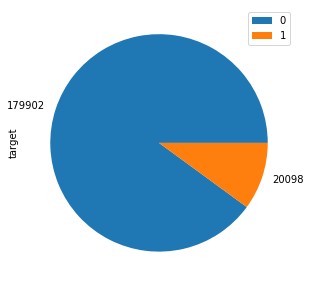

In [12]:
#polt a chart to show the observation per target class
plt.figure(figsize=(5,5))
labels = class_count.index
values = class_count.values
santander_train['target'].value_counts().plot(kind='pie', labels=values)
plt.legend(labels)

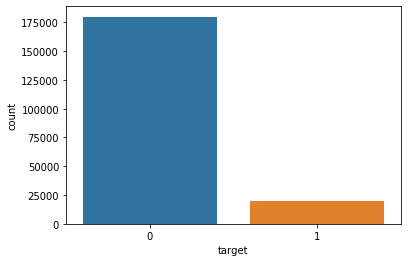

In [13]:
#polt a chart to show the observation per target class
sns.countplot(x='target', data=santander_train)

From above PIE chart and Countplot we can see that data is imbalanced.
Class 0 has +175000, but Class 1 has only +20000

In [14]:
#Extracting features from Train dataframe
Train_features = santander_train.columns[2:]
Train_features

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

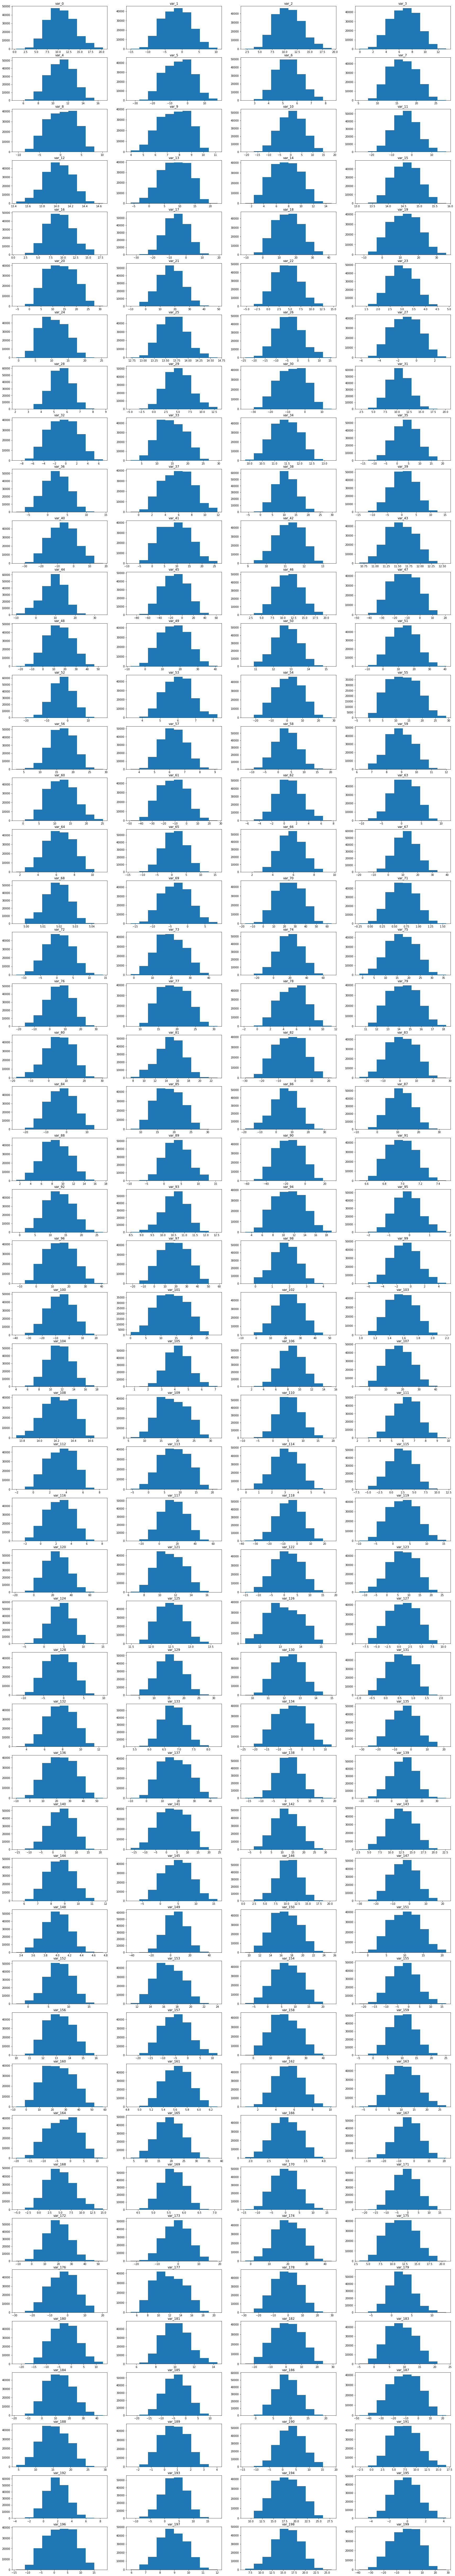

In [15]:
#Checking how the data is Distributed, using Histogram
plt.figure(figsize=(30,180))
for n, i in enumerate(Train_features):
    n=n+1
    plt.subplot(50,4,n)
    plt.hist(santander_train[i])
    plt.title(i)

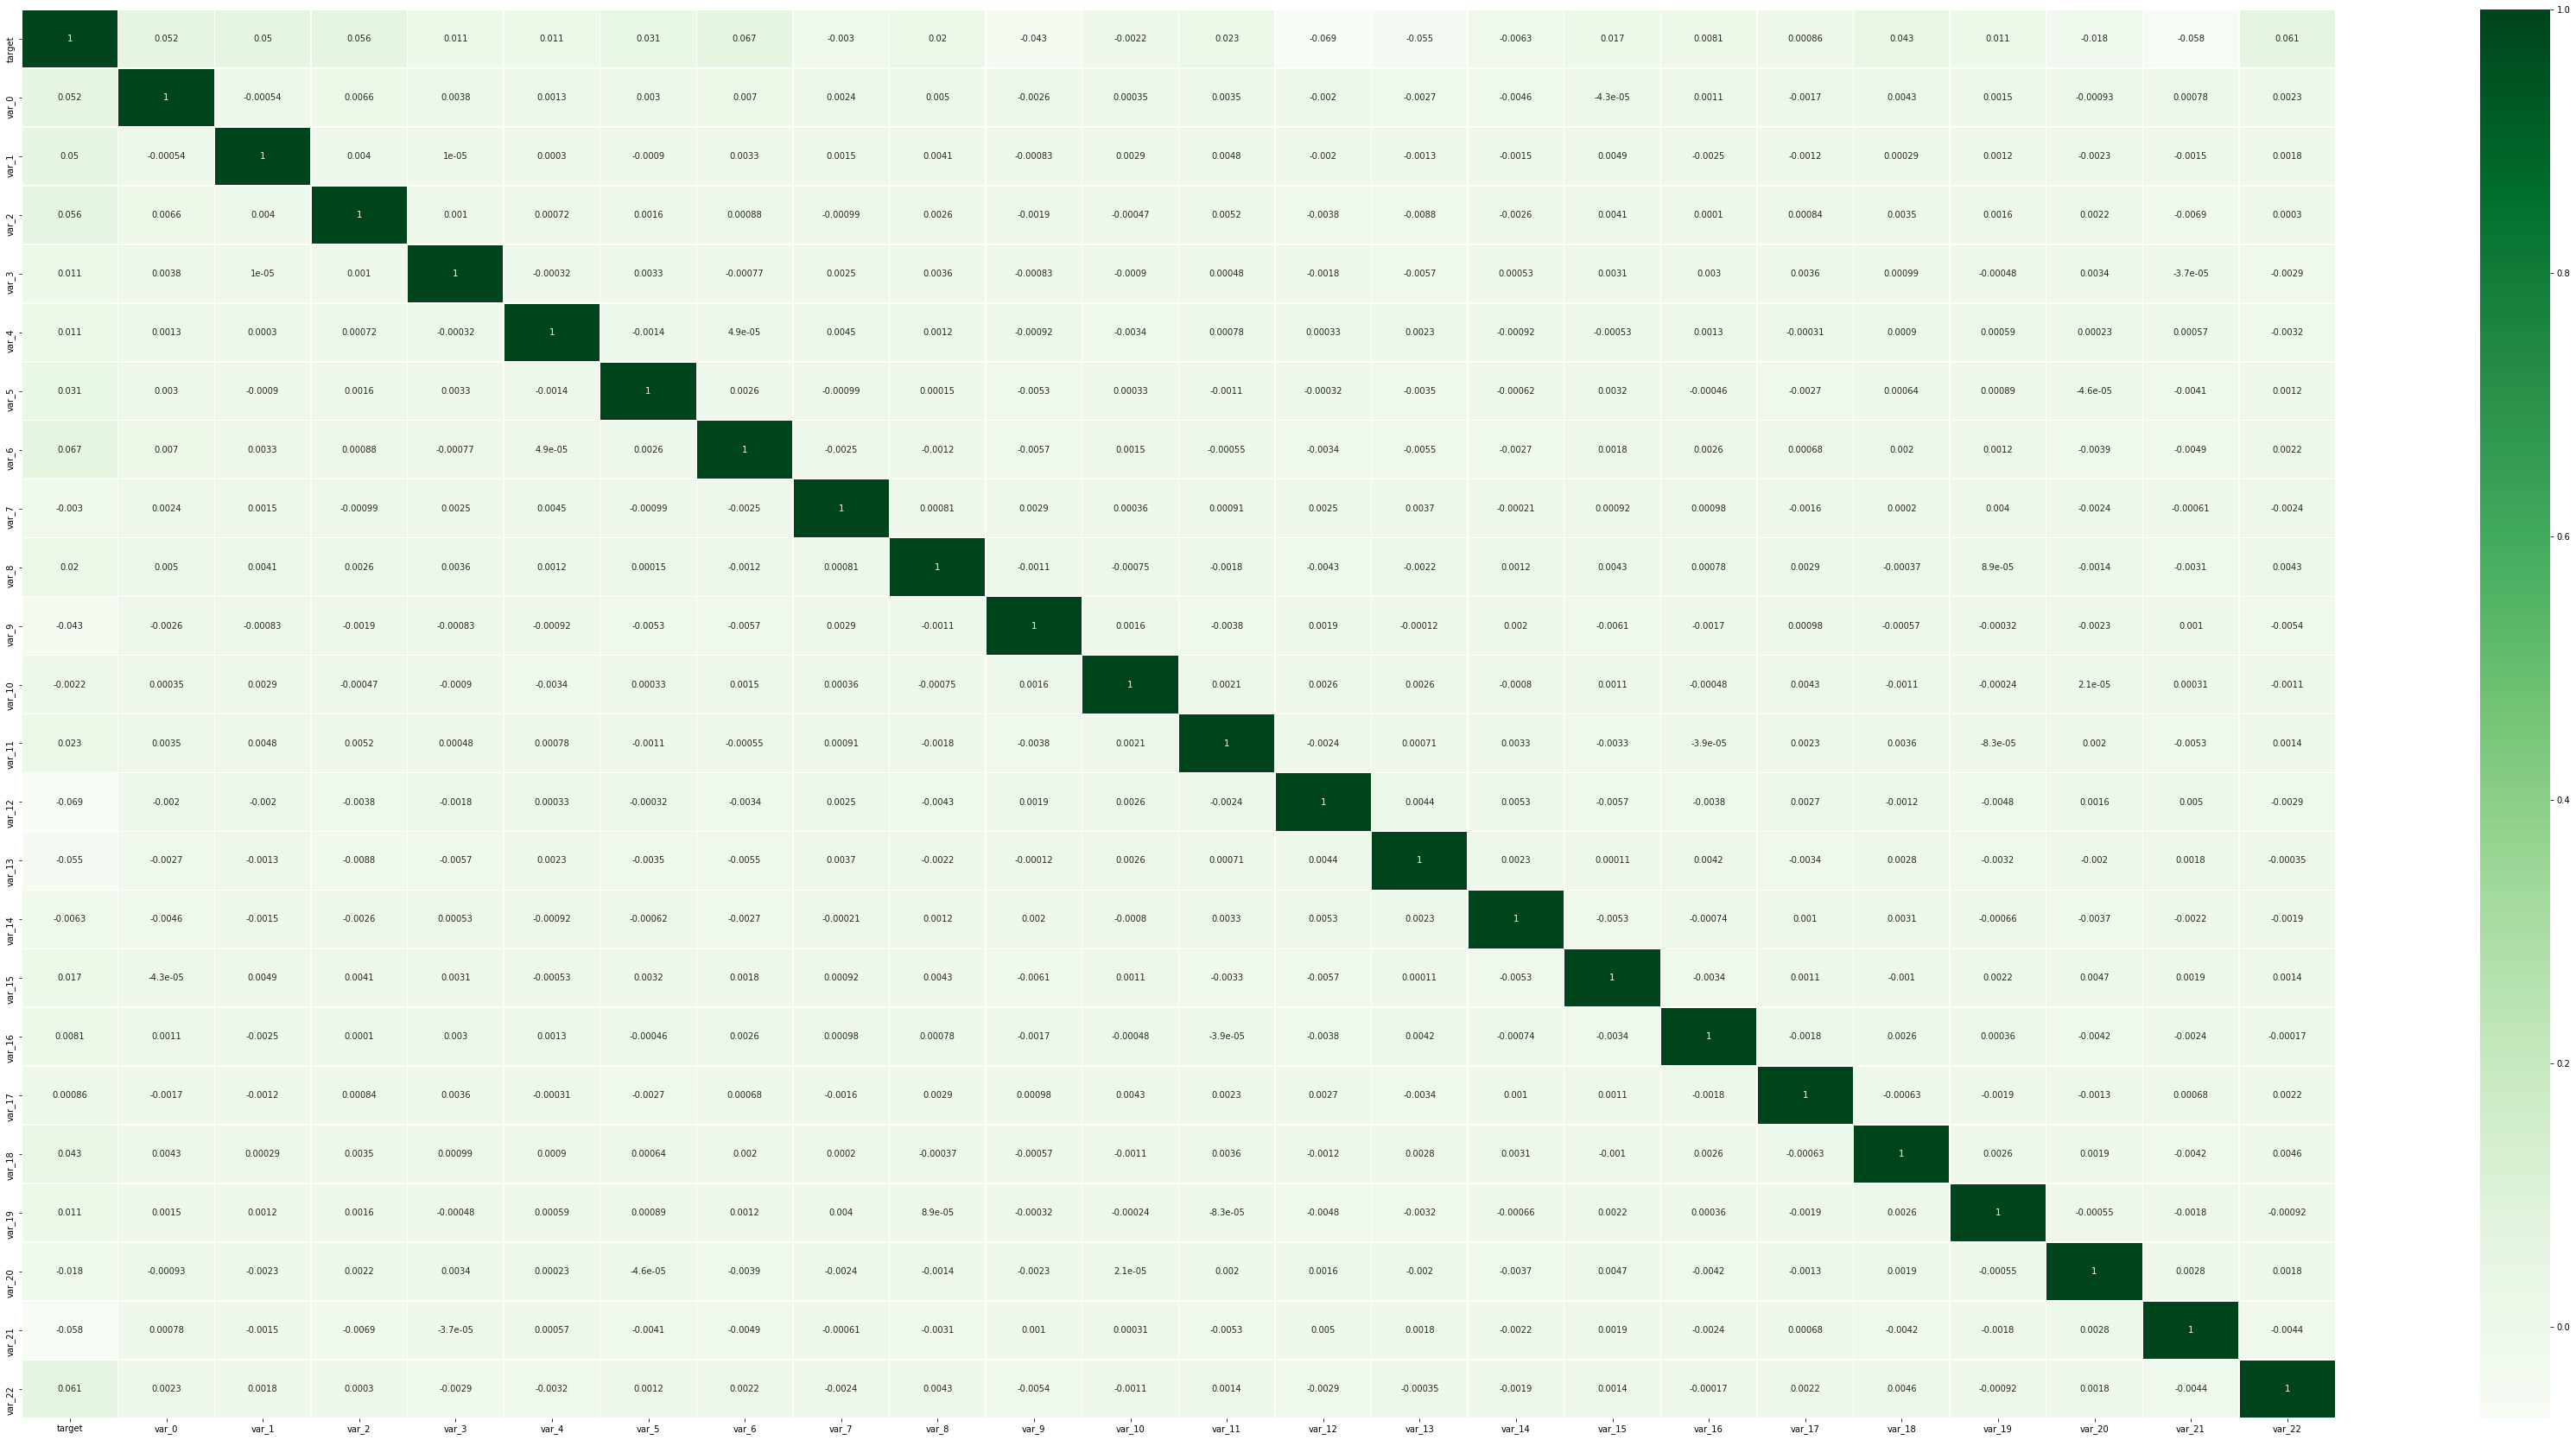

In [16]:
#Checking Correlation of the first 50 features in train thru HEAT MAP
Train_corr = santander_train.iloc[:,:25].corr()
plt.figure(figsize=(60,30))
ax = sns.heatmap(Train_corr, linewidths=0.5, cmap="Greens", annot=True)

In [17]:
#split X and y from Train dataset
X = santander_train.drop(columns=["ID_code", "target"], axis=1)
y = santander_train["target"]

In [18]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Method 1 :- Train data with Train Test Split for KNN Model

In [20]:
#First will use train_test_split model for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [21]:
print('X_train -> ', X_train.shape)
print('X_test -> ', X_test.shape)
print('y_train -> ' ,y_train.shape)
print('y_test -> ', y_test.shape)

X_train ->  (140000, 200)
X_test ->  (60000, 200)
y_train ->  (140000,)
y_test ->  (60000,)


In [22]:
#basic KNN algorithm
#instantiate the classfier
knn = KNeighborsClassifier(n_neighbors=215, metric='euclidean')

In [23]:
#fit method, the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=215, p=2,
                     weights='uniform')

In [24]:
%%time
#now prediction on X_test data

y_pred = knn.predict(X_test)

Wall time: 1h 55min 34s


In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
#compare the actuall response value y-test v/s predicited value y_pred
alg_accuracy = metrics.accuracy_score(y_test, y_pred)* 100
print("Model accuracy score -> ", alg_accuracy)

Model accuracy score ->  89.98833333333334


In [27]:
#confusion_matrix and Graph plot
print(metrics.confusion_matrix(y_test, y_pred))

[[53993     0]
 [ 6007     0]]


In [28]:
#Prin the Classification report
model_scores=classification_report(y_test, y_pred)
print("----- Model scores for KNN method ------")
print(model_scores)


----- Model scores for KNN method ------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53993
           1       0.00      0.00      0.00      6007

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



C:\Users\rnp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


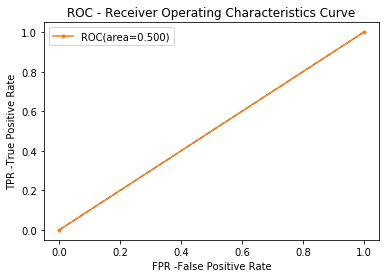

AUC Score :  50.0
ROC Score :  50.0


In [29]:
#Calculate ROC, AUC and plot Graph
auc = roc_auc_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)


#calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.title("ROC - Receiver Operating Characteristics Curve")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr,marker='.',label='ROC(area=%0.3f)' %roc)
plt.xlabel("FPR -False Positive Rate")
plt.ylabel("TPR -True Positive Rate")
plt.legend()
plt.show()

print("AUC Score : ", auc*100)
print("ROC Score : ", roc*100)

In [30]:
#Model prediction on Test data
testdf_y = santander_test.drop(columns=['ID_code'], axis=1)

In [31]:
testdf_y.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [32]:
#will limit the test sample to 5000 to test the model
test_sample = testdf_y[:5000]

In [33]:
%%time
#Predict the model for TEST data
pred_test = knn.predict(test_sample)

Wall time: 7min 33s


In [34]:
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

''' First we tried out KNN ML model with Train Test split model validation, It is basic method used for larger data sets in ML to get nearest values.
But drawback of this model is it takes more time in training and predicting.

Model is predicting 89 percent accuracy level.
Displayed corresponding reports and metrices which gives more specific values to interprete the model outcome
Looking at the scores, report model is not doing well with unblanaced data

As, next step to overcome time the model is taking and to improve accuracy level and ROC scores. Will try out Logistic regression model'''


### METHOD 2 :- Train data with K-fold model for Logistic regrssion model

In [35]:
skf=StratifiedKFold(n_splits=25,random_state=35,shuffle=True)
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test=X.iloc[train_index], X.iloc[test_index]
    y_train, y_test=y.iloc[train_index], y.iloc[test_index]

print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)


TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [    35     46     65 ... 199974 199981 199987]
TRAIN: [     0      1      2 ... 199996 199997 199999] TEST: [    44     76     94 ... 199928 199961 199998]
TRAIN: [     0      1      2 ... 199996 199998 199999] TEST: [     9     12     19 ... 199967 199980 199997]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [     7     23     25 ... 199924 199941 199953]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [     6     33    116 ... 199868 199885 199894]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [    22     85     97 ... 199898 199926 199958]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [    17     34     38 ... 199983 199991 199993]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [     5     32     40 ... 199942 199963 199996]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [    15     67     79 ... 199925 199962 199975]
TRAIN: [     0     

In [36]:
%%time
##Logistic regrssion model

lrm = LogisticRegression(random_state=45)
lrm.fit(X_train, y_train)


C:\Users\rnp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 5min 12s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=45, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
predcit_lrm = lrm.predict(X_test)

In [38]:
predcit_lrm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
print("Logistic regression accuracy scores -> ", metrics.accuracy_score(y_test,predcit_lrm)*100)

Logistic regression accuracy scores ->  91.4989373671709


In [40]:
#confusion_matrix and Graph plot
conf_mat = metrics.confusion_matrix(y_test,predcit_lrm)
print(conf_mat)

[[7088  108]
 [ 572  231]]


Text(0.5, 1, 'Actual vs. Predicted Confusion Matrix')

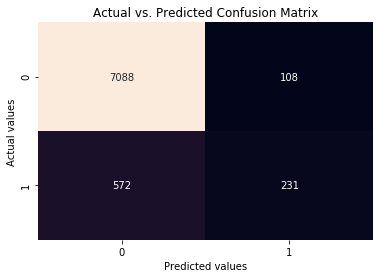

In [41]:
sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Actual vs. Predicted Confusion Matrix")

In [42]:
#Print the Classification report
model_scores=classification_report(y_test,predcit_lrm)
print("----- Model scores for KNN method ------")
print(model_scores)


----- Model scores for KNN method ------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7196
           1       0.68      0.29      0.40       803

    accuracy                           0.91      7999
   macro avg       0.80      0.64      0.68      7999
weighted avg       0.90      0.91      0.90      7999



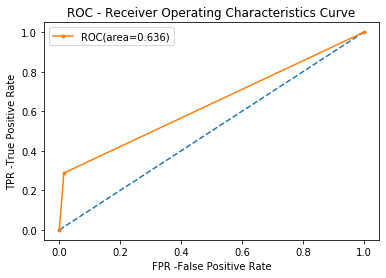

AUC Score :  63.6331447455588
ROC Score :  63.6331447455588


In [43]:
#Calculate ROC, AUC and plot Graph
auc = roc_auc_score(y_test, predcit_lrm)
roc=roc_auc_score(y_test, predcit_lrm)


#calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, predcit_lrm)
plt.title("ROC - Receiver Operating Characteristics Curve")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr,marker='.',label='ROC(area=%0.3f)' %roc)
plt.xlabel("FPR -False Positive Rate")
plt.ylabel("TPR -True Positive Rate")
plt.legend()
plt.show()

print("AUC Score : ", auc*100)
print("ROC Score : ", roc*100)

In [44]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [45]:
testdf_y = test_df.drop(columns=['ID_code'], axis=1)

In [46]:
%time
pred_test = lrm.predict(testdf_y)

Wall time: 0 ns


In [47]:
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
#Calculate which feature are more important from Logistic regrsssion 

perm = PermutationImportance(lrm, random_state=5).fit(X_test, y_test)

In [49]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=100)

Weight,Feature
0.0025 ± 0.0017,var_139
0.0023 ± 0.0012,var_174
0.0022 ± 0.0024,var_12
0.0020 ± 0.0017,var_172
0.0019 ± 0.0020,var_26
0.0018 ± 0.0007,var_76
0.0017 ± 0.0013,var_22
0.0015 ± 0.0006,var_166
0.0015 ± 0.0014,var_146
0.0014 ± 0.0020,var_165


In [51]:
#concatenate the predecited values to Test dataset

Test_predict_LRM = pd.DataFrame(santander_test)
Test_predict_LRM["target"] = pred_test
Test_predict_LRM.to_csv("Test_Predict.csv", index=False)
Test_predict_LRM.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,0
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,0
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,0
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,0


''' Here we tried out Logistic ML model with Stratified KFold model validation, It worked well with larger data sets and it took very lees time to train and predict model 

Model is predicting 91.4 percent accuracy level. Displayed corresponding reports and metrices which gives more specific values to interprete the model outcome, also performed the importance of features which are having more weight in Logistic model. 

Considering the Accuracy score, classification report (Precision, F1-Score, Recall) and ROC score, Logistic regression model work well compare to KNN.

Looking at the scores and report, model is working quite well with unbalanced data.
As, next step will try implementing the Random Forest model and see if we achive/improve accuracy level and ROC scores. '''



### METHOD 3 :- Train data with Train Test Split for Random Forest model

In [5]:
#split X and y from Train dataset
X = santander_train.drop(columns=["ID_code", "target"], axis=1)
y = santander_train["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [6]:
RFC = RandomForestClassifier(random_state=45)

In [7]:
RFC.fit(X_train,y_train)

C:\Users\rnp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [8]:
RFM_Predict = RFC.predict(X_test)

In [9]:
print("Accuracy of the Random Forest Model -> ", accuracy_score(RFM_Predict, y_test)*100)

Accuracy of the Random Forest Model ->  90.00666666666667


Text(0.5, 1, 'Actual vs. Predicted Confusion Matrix')

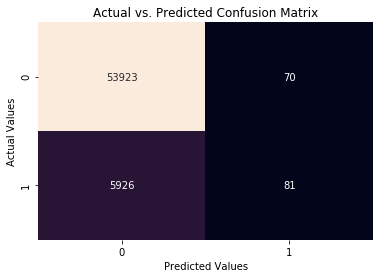

In [10]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, RFM_Predict)

sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [12]:
#Print the Classification report
model_scores=classification_report(y_test, RFM_Predict)
print("----- Model scores for KNN method ------")
print(model_scores)


----- Model scores for KNN method ------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53993
           1       0.54      0.01      0.03      6007

    accuracy                           0.90     60000
   macro avg       0.72      0.51      0.49     60000
weighted avg       0.86      0.90      0.86     60000



In [13]:
predictions_prob = RFC.predict_proba(X_test)[:,1 ]
predictions_prob

array([0. , 0. , 0.1, ..., 0. , 0.2, 0.2])

In [14]:
predictions_prob = RFC.predict_proba(X_test)[:,0 ]
predictions_prob

array([1. , 1. , 0.9, ..., 1. , 0.8, 0.8])

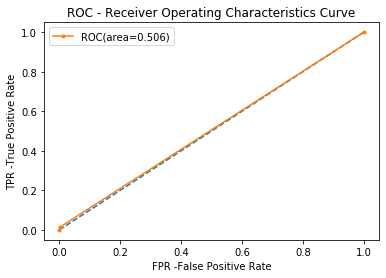

AUC Score :  50.60939019985484
ROC Score :  50.60939019985484


In [15]:
#Calculate ROC, AUC and plot Graph
auc = roc_auc_score(y_test, RFM_Predict)
roc=roc_auc_score(y_test, RFM_Predict)


#calculate ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, RFM_Predict)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_prob, pos_label=0)
plt.title("ROC - Receiver Operating Characteristics Curve")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr,marker='.',label='ROC(area=%0.3f)' %roc)
plt.xlabel("FPR -False Positive Rate")
plt.ylabel("TPR -True Positive Rate")
plt.legend()
plt.show()

print("AUC Score : ", auc*100)
print("ROC Score : ", roc*100)

In [16]:
#Model prediction on Test data
testdf_y = santander_test.drop(columns=['ID_code'], axis=1)

In [17]:
Test_predict = RFC.predict(testdf_y)

In [18]:
Test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

''' Here we tried out Random Forest ML model with Train Test Split model validation, It worked well with larger data sets and it took very lees time to train and predict model 

Model is predicting 90 percent accuracy level. Displayed corresponding reports and metrices which gives more specific values to interprete the model outcome.

Considering the Accuracy score, classification report (Precision, F1-Score, Recall) and ROC score, Random Forest  model is almost similar to KNN. But, it takes less time to train and predict model.


From all the model implemented on the Santander dataset, Logistic regression is comparatively  well'''